In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
#null or missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())


['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [7]:
final_dataset = df.drop('Car_Name',axis=1)

In [8]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
final_dataset['Current_Year']=2020


In [10]:
final_dataset['No_Year'] = final_dataset['Current_Year'] - final_dataset['Year']

In [11]:
final_dataset.drop(['Current_Year','Year'],axis=1,inplace=True)

In [12]:
final_dataset = pd.get_dummies(final_dataset  , drop_first=1)

In [13]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [14]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_Year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [15]:
import seaborn as sns

In [16]:
#sns.pairplot(final_dataset)

In [17]:
#corrmat = final_dataset.corr()
#top_corr_feature = corrmat.index
#plt.figure(figsize=(20,20))
#g = sns.heatmap(final_dataset[top_corr_feature].corr(),annot=True,cmap='RdYlGn')

In [18]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [19]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [20]:
##fearture Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [21]:
print(model.feature_importances_)

[0.35399142 0.0390735  0.00051923 0.0784852  0.22905001 0.0160541
 0.14133984 0.1414867 ]


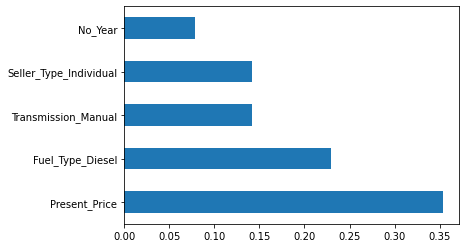

In [22]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train ,y_test = train_test_split(X,y,test_size=0.2)

In [24]:
from sklearn.ensemble import RandomForestRegressor #use this cuz no feature scaling required'
rf = RandomForestRegressor()

In [25]:
#hyperparameters
n_estimators = [int(x) for x in np.linspace(100,1200,num=12)]
max_features = ['auto' , 'sqrt']
max_depth =  [int(x) for x in np.linspace(5,30 ,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:
random_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
    }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [28]:
rf_random = RandomizedSearchCV(estimator=rf , param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [29]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   51.3s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [30]:
predictions = rf_random.predict(X_test)

In [31]:
predictions

array([ 5.27446961, 22.06592007,  7.92956474, 10.9224594 ,  5.21681967,
        0.64959738, 10.22658894,  4.67944989,  6.57872568,  4.01520924,
       10.78348551,  1.45569799,  8.44836309,  1.14025444,  1.15057842,
        6.92393762, 10.10954155,  4.63041105,  3.36548412,  9.93692808,
        0.39386917,  4.63937444, 10.93390298,  2.95668938,  0.39233328,
        5.97459059,  0.61273087,  0.60968087,  2.87881497,  0.26812422,
        2.92124082,  5.65754039,  5.54944331,  7.39779867,  0.70768192,
        4.72719189,  1.14039312,  4.5361227 ,  0.24949954,  5.22046339,
        5.44600259,  0.86763653,  4.77207153, 15.29274659,  5.61625879,
        0.44307426,  5.09627267,  0.29104129,  7.71659086,  0.57751571,
        4.44676105,  7.92761395, 10.008268  ,  2.87881497, 22.1729557 ,
       10.88481072,  0.26110158,  4.54307429,  0.4449921 ,  5.87540375,
       22.06592007])

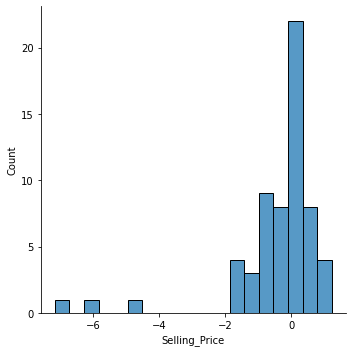

In [32]:
sns.displot(y_test-predictions)

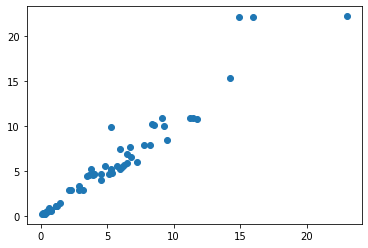

In [33]:
plt.scatter(y_test , predictions)

In [34]:
import pickle

In [35]:
file = open('model.pkl','wb')

pickle.dump(rf_random,file)

In [36]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [37]:
rf_random.best_score_

-3.826742172710854

In [38]:
from sklearn import metrics

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7773188522216492
MSE: 2.2690880339512773
RMSE: 1.5063492403660173
